<a href="https://colab.research.google.com/github/Farheen96/Jupyter-notebooks/blob/main/Task_3_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---
## 2. Load data

In [2]:
df = pd.read_csv('./clean_data_after_eda.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [3]:
df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,0.000908,2.086294,99.530517,44.235794,2.086425,9.953056e+01,44.236702,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000,0


---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [4]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [5]:
# prompt: to perform feature engineering, can we remove any of the columns in the datasets?
# There will almost always be columns in a dataset that can be removed, perhaps because they are not relevant to the analysis, or they only have 1 unique value.

# Check for columns with only 1 unique value
for column in df.columns:
    if df[column].nunique() == 1:
        print(column)
# Check for columns with missing values
df.isnull().sum()


,0
id,0
channel_sales,0
cons_12m,0
cons_gas_12m,0
cons_last_month,0
date_activ,0
date_end,0
date_modif_prod,0
date_renewal,0
forecast_cons_12m,0


In [6]:
# can we expand the datasets and use existing columns to create new features?
# For example, if you have “date” columns, in their raw form they are not so useful. But if you were to extract month, day of month, day of year and year into individual columns, these could be more useful.

# Extract month, day of month, day of year and year from 'date_activ'
df['date_activ_month'] = df['date_activ'].dt.month
df['date_activ_day'] = df['date_activ'].dt.day
df['date_activ_dayofyear'] = df['date_activ'].dt.dayofyear
df['date_activ_year'] = df['date_activ'].dt.year

# Extract month, day of month, day of year and year from 'date_end'
df['date_end_month'] = df['date_end'].dt.month
df['date_end_day'] = df['date_end'].dt.day
df['date_end_dayofyear'] = df['date_end'].dt.dayofyear
df['date_end_year'] = df['date_end'].dt.year

# Extract month, day of month, day of year and year from 'date_modif_prod'
df['date_modif_prod_month'] = df['date_modif_prod'].dt.month
df['date_modif_prod_day'] = df['date_modif_prod'].dt.day
df['date_modif_prod_dayofyear'] = df['date_modif_prod'].dt.dayofyear
df['date_modif_prod_year'] = df['date_modif_prod'].dt.year

# Extract month, day of month, day of year and year from 'date_renewal'
df['date_renewal_month'] = df['date_renewal'].dt.month
df['date_renewal_day'] = df['date_renewal'].dt.day
df['date_renewal_dayofyear'] = df['date_renewal'].dt.dayofyear
df['date_renewal_year'] = df['date_renewal'].dt.year

# Calculate the difference between dates
df['activ_end_diff'] = (df['date_end'] - df['date_activ']).dt.days
df['modif_renewal_diff'] = (df['date_renewal'] - df['date_modif_prod']).dt.days


In [7]:
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,date_modif_prod_month,date_modif_prod_day,date_modif_prod_dayofyear,date_modif_prod_year,date_renewal_month,date_renewal_day,date_renewal_dayofyear,date_renewal_year,activ_end_diff,modif_renewal_diff
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,11,1,305,2015,6,23,174,2015,1096,-131
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,8,21,233,2009,8,31,243,2015,2566,2201
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,4,16,106,2010,4,17,107,2015,2192,1827
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,3,30,89,2010,3,31,90,2015,2192,1827
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,1,13,13,2010,3,9,68,2015,2245,1881


In [9]:
df.shape


(14606, 62)

In [8]:
# check how many rows of "channel_sales" have value "MISSING"

df[df['channel_sales'] == "MISSING"].shape[0]


3725

In [10]:
# can we combine some columns together to create “better” columns? We’re trying to accurately predict churn - so a “better” column could be a column that improves the accuracy of the model.And which columns to combine? This can sometimes be a matter of experimenting until you find something useful, or you may notice that 2 columns share very similar information so you want to combine them.

# For example, we can combine the 'cons_12m' and 'cons_gas_12m' columns
# to create a new column called 'total_consumption_12m'.

df['total_consumption_12m'] = df['cons_12m'] + df['cons_gas_12m']

# Similarly, we can combine the 'forecast_cons_12m' and 'forecast_cons_year'
# columns to create a new column called 'total_forecast_consumption'.

df['total_forecast_consumption'] = df['forecast_cons_12m'] + df['forecast_cons_year']

# We can also create a new column called 'has_gas' which indicates whether a customer
# uses gas or not.

df['has_gas'] = df['has_gas'].map({'t': 1, 'f': 0})

# These are just a few examples of how we can combine columns to create new features.
# The specific columns you choose to combine and the way you combine them will depend
# on the specific problem you are trying to solve and the data you have available.


In [11]:
df.shape

(14606, 64)

In [12]:
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,date_modif_prod_dayofyear,date_modif_prod_year,date_renewal_month,date_renewal_day,date_renewal_dayofyear,date_renewal_year,activ_end_diff,modif_renewal_diff,total_consumption_12m,total_forecast_consumption
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,305,2015,6,23,174,2015,1096,-131,54946,0.00
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,233,2009,8,31,243,2015,2566,2201,4660,189.95
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,106,2010,4,17,107,2015,2192,1827,544,47.96
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,89,2010,3,31,90,2015,2192,1827,1584,240.04
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,13,2010,3,9,68,2015,2245,1881,4425,971.75


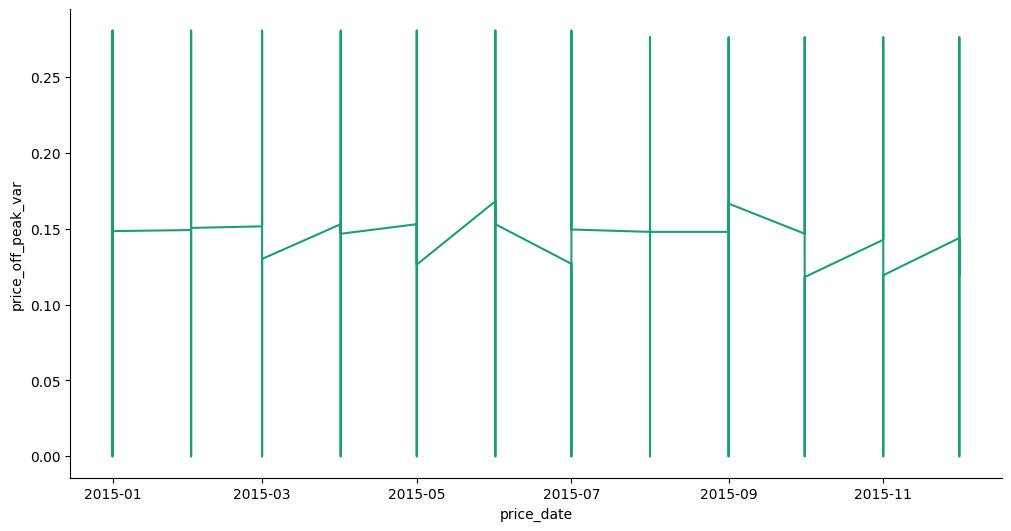

In [13]:
# title price_date vs price_off_peak_var

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['price_date']
  ys = series['price_off_peak_var']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = price_df.sort_values('price_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('price_date')
_ = plt.ylabel('price_off_peak_var')

Here's what can be inferred:

**Cyclic Pattern:** The vertical lines indicate a recurring pattern throughout the year, suggesting a cycle in off-peak price variation.

**Monthly Fluctuations**: The price variation shows peaks and troughs each month, indicating regular fluctuations within each month.

**Seasonal Variation**: The overall trend appears to slightly decrease over the year, which could indicate a seasonal effect on the off-peak prices.

**Volatility**: The long vertical lines indicate that the data has a significant range or volatility each month, with some months showing more variation than others.

In [21]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()
#This groups the data by company (id) and date, then calculates the average off-peak variable and fixed prices.

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()
#This separates the prices for January and December.
#Here, first() assumes January is the first month in the group,
#and last() assumes December is the last month. Make sure the data is ordered correctly.

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
#Here, you're merging the December and January prices on the company ID and
#calculating the difference for both energy and power prices.
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


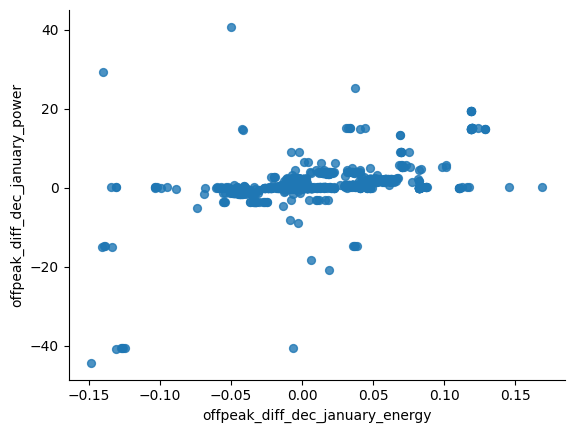

In [17]:
# offpeak_diff_dec_january_energy vs offpeak_diff_dec_january_power

from matplotlib import pyplot as plt
diff.plot(kind='scatter', x='offpeak_diff_dec_january_energy', y='offpeak_diff_dec_january_power', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

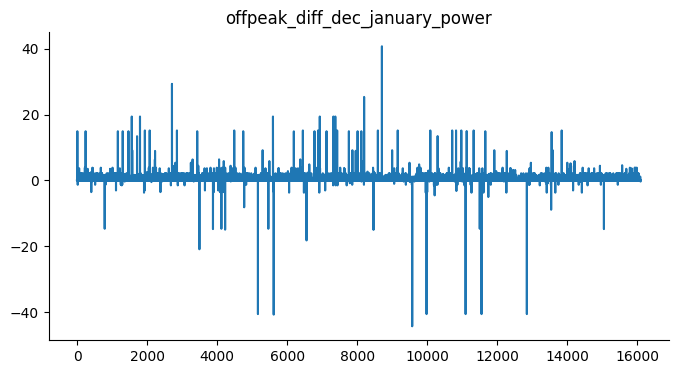

In [18]:
# @title offpeak_diff_dec_january_power

from matplotlib import pyplot as plt
diff['offpeak_diff_dec_january_power'].plot(kind='line', figsize=(8, 4), title='offpeak_diff_dec_january_power')
plt.gca().spines[['top', 'right']].set_visible(False)

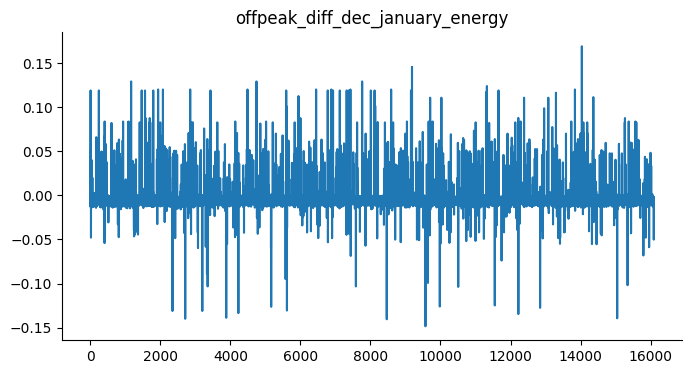

In [19]:
# @title offpeak_diff_dec_january_energy

from matplotlib import pyplot as plt
diff['offpeak_diff_dec_january_energy'].plot(kind='line', figsize=(8, 4), title='offpeak_diff_dec_january_energy')
plt.gca().spines[['top', 'right']].set_visible(False)

In [22]:
# Calculate month-over-month variability

# Calculate month-over-month price difference
monthly_price_by_id['price_off_peak_var_diff'] = monthly_price_by_id.groupby('id')['price_off_peak_var'].diff()
monthly_price_by_id['price_off_peak_fix_diff'] = monthly_price_by_id.groupby('id')['price_off_peak_fix'].diff()

# Calculate variability metrics (e.g., standard deviation) for each company
variability = monthly_price_by_id.groupby('id')[['price_off_peak_var_diff', 'price_off_peak_fix_diff']].std().reset_index()
variability.columns = ['id', 'offpeak_var_std', 'offpeak_fix_std']

# Merge variability back into main dataframe
df = df.merge(variability, on='id', how='left')


In [23]:
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,date_renewal_month,date_renewal_day,date_renewal_dayofyear,date_renewal_year,activ_end_diff,modif_renewal_diff,total_consumption_12m,total_forecast_consumption,offpeak_var_std,offpeak_fix_std
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,6,23,174,2015,1096,-131,54946,0.00,0.009195,1.062973
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,8,31,243,2015,2566,2201,4660,189.95,0.001478,0.053603
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,4,17,107,2015,2192,1827,544,47.96,0.001394,0.053602
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,3,31,90,2015,2192,1827,1584,240.04,0.001343,0.053602
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,3,9,68,2015,2245,1881,4425,971.75,0.002588,0.049121


In [ ]:
# prompt: # Calculate rolling averages

# Calculate rolling averages for off-peak prices
monthly_price_by_id['offpeak_var_rolling_mean'] = monthly_price_by_id.groupby('id')['price_off_peak_var'].rolling(window=3).mean().reset_index(0, drop=True)
monthly_price_by_id['offpeak_fix_rolling_mean'] = monthly_price_by_id.groupby('id')['price_off_peak_fix'].rolling(window=3).mean().reset_index(0, drop=True)

# Merge rolling averages back into main dataframe
df = df.merge(monthly_price_by_id[['id', 'price_date', 'offpeak_var_rolling_mean', 'offpeak_fix_rolling_mean']], on=['id', 'price_date'], how='left')

df.head()


In [22]:
monthly_price_by_id['rolling_var_mean'] = monthly_price_by_id.groupby('id')['price_off_peak_var'].rolling(window=3).mean().reset_index(level=0, drop=True)
monthly_price_by_id['rolling_fix_mean'] = monthly_price_by_id.groupby('id')['price_off_peak_fix'].rolling(window=3).mean().reset_index(level=0, drop=True)

# Merge these features into the final DataFrame
final_features = pd.merge(diff, monthly_price_by_id[['id', 'price_var_diff', 'price_fix_diff', 'rolling_var_mean', 'rolling_fix_mean']].drop_duplicates(), on='id')

# Inspect the final features
final_features.head()


,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,price_var_diff,price_fix_diff,rolling_var_mean,rolling_fix_mean
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916,NaN,NaN,NaN,NaN
1,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916,0.000000,0.000000,NaN,NaN
2,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916,0.001969,0.162916,0.126754,40.620275
3,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916,0.000000,0.000000,0.127411,40.674580
4,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916,0.000000,0.000000,0.128067,40.728885


In [23]:
final_features.isnull().sum()

,0
id,0
offpeak_diff_dec_january_energy,0
offpeak_diff_dec_january_power,0
price_var_diff,16096
price_fix_diff,16096
rolling_var_mean,32192
rolling_fix_mean,32192


1. **Removing Unnecessary Columns**

First, let’s identify any columns that might be redundant or irrelevant. To do this, check for columns with:

* **Single unique values** (constant columns).  
* **High correlation** with other features (if two columns are highly correlated, one might be redundant).


In [16]:
# Remove columns with a single unique value
single_value_cols = [col for col in price_df.columns if price_df[col].nunique() <= 1]
price_df = price_df.drop(columns=single_value_cols)
price_df

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
...,...,...,...,...,...,...,...,...
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


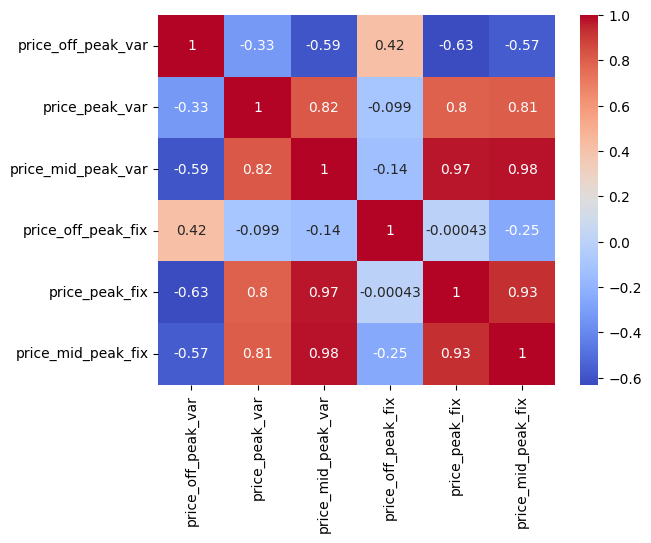

In [17]:
# Identify columns for correlation calculation (exclude 'id')
numeric_cols = price_df.select_dtypes(include=['number']).columns

# Calculate correlation matrix only for numeric columns
correlation_matrix = price_df[numeric_cols]
sns.heatmap(correlation_matrix.corr() , cmap="coolwarm" , annot=True)
plt.show()

# The correlation matrix shows how each numerical feature in the dataset relates to every other numerical feature.

 Positive Correlation (Values closer to 1):
 - A strong positive correlation (close to 1) suggests a direct relationship.
   For example, if 'price_peak_var' and 'price_peak_fix' have a high positive correlation, it means that as one increases, the other tends to increase as well.

 Negative Correlation (Values closer to -1):
 - A strong negative correlation (close to -1) suggests an inverse relationship.
   If 'price_off_peak_var' and 'price_off_peak_fix' are negatively correlated, it means that as one increases, the other tends to decrease.

 Weak or No Correlation (Values close to 0):
 - Values close to 0 indicate a weak or no linear relationship between the two variables.
   Changes in one variable don't reliably predict changes in the other.

 Key Observations from the Plot:
 - Strong Positive Correlations: You'll likely see strong positive correlations between different price components within the same category (peak, off-peak). For example, 'price_peak_fix' and 'price_peak_var' might be highly correlated.
 - Weaker Correlations: Correlations between price components of different categories (peak vs. off-peak) might be weaker or even negative.
 - No Clear Patterns:  It's also possible that you won't see very strong correlations overall, suggesting that the price components don't have simple linear relationships.

 How to Use This Information:
 - Feature Selection: If you find highly correlated features, you might consider removing one of them to simplify your model and avoid multicollinearity issues.
 - Feature Engineering: Understanding correlations can guide you in creating new features. For example, you might create a ratio or difference between two correlated features to capture a more meaningful relationship.


In [18]:


# Calculate the ratio of 'price_peak_var' to 'price_peak_fix'
price_df['peak_var_to_fix_ratio'] = price_df['price_peak_var'] / price_df['price_peak_fix']

# Calculate the difference between 'price_off_peak_var' and 'price_off_peak_fix'
price_df['offpeak_var_minus_fix_diff'] = price_df['price_off_peak_var'] - price_df['price_off_peak_fix']

# Display the updated DataFrame
price_df.head()


,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,peak_var_to_fix_ratio,offpeak_var_minus_fix_diff
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,NaN,-44.115564
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,NaN,-44.115564
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0,NaN,-44.115564
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0,NaN,-44.117305
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0,NaN,-44.117305
